In [1]:
# Fonots

# Ez a kis fostalicska csak arra kell, hogy belenézzek a metric_log-ba

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time
from pandas.plotting import scatter_matrix

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-29 19:59:14
19:59:14


In [2]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,18:53:47,18:53:4,0.51300,0.513000,1,0.1,4.4,94.9,5.0,...,215506.0,794397.6,0.0,561942.8,100.0,53.4,53.4,48.1,53.4,48.1
1,192.168.0.6,18:53:50,18:53:5,571.43645,232.550479,1,37.8,29.8,67.9,32.0,...,215509.6,797076.4,0.0,561963.2,100.0,315.3,315.3,313.6,315.3,313.7
2,192.168.0.6,18:54:00,18:54:0,32.62180,16.626424,1,87.9,64.6,32.1,67.8,...,215416.0,798544.8,0.0,562018.0,100.0,661.9,661.9,656.7,661.4,656.3
3,192.168.0.6,18:54:10,18:54:1,25.93570,12.892904,1,100.0,65.3,30.8,69.1,...,215428.0,798370.4,0.0,562020.4,100.0,751.0,751.0,746.1,751.0,746.2
4,192.168.0.6,18:54:20,18:54:2,29.68000,15.209060,1,93.1,65.3,30.5,69.5,...,215436.0,798357.6,0.0,562052.8,100.0,686.3,686.3,682.7,686.3,682.8


In [3]:
df['worker_give_metrics'].unique()

array(['192.168.0.6'], dtype=object)

In [4]:
pd.options.display.float_format = "{:,.2f}".format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
response_time_p95,221.00,54.86,94.19,0.51,17.78,18.78,30.47,571.44
response_time,221.00,33.60,61.24,0.51,13.71,14.83,16.35,309.58
worker_number,221.00,4.59,2.59,1.00,2.00,5.00,7.00,8.00
request_rate,221.00,177.40,54.13,0.10,143.30,178.90,218.40,299.50
CPU0User%,221.00,51.79,19.90,4.40,37.30,46.50,65.30,94.70
CPU0Idle%,221.00,44.72,20.90,0.00,30.50,50.20,59.70,94.90
CPU0Total%,221.00,55.16,20.95,5.00,40.20,49.30,69.50,100.00
[DSK:sda]Reads,221.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
[DSK:sda]RMerge,221.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
[DSK:sda]RKBytes,221.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


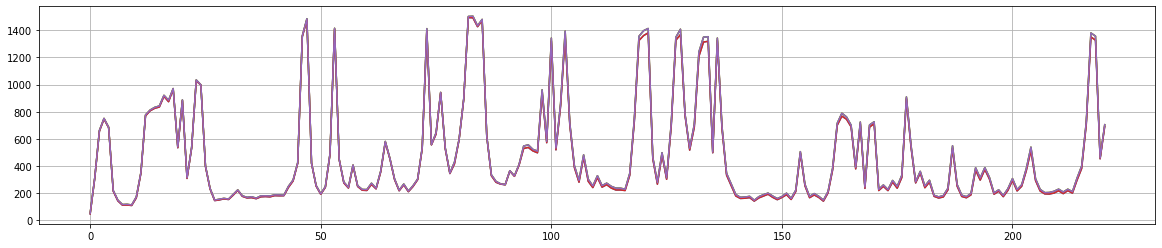

In [5]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

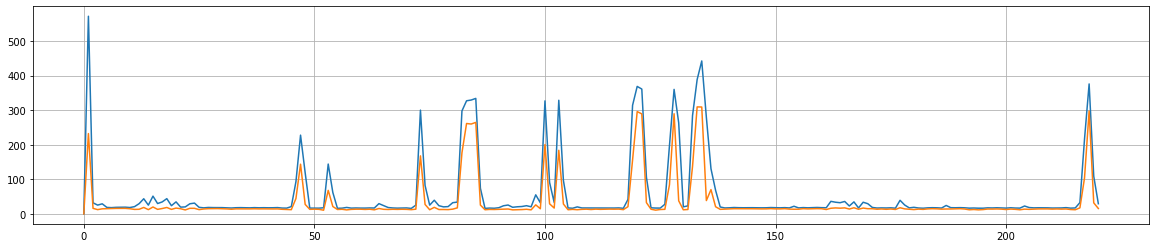

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

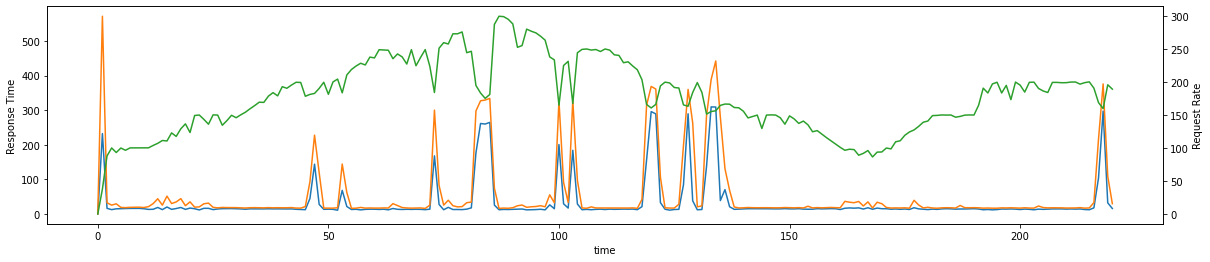

In [7]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

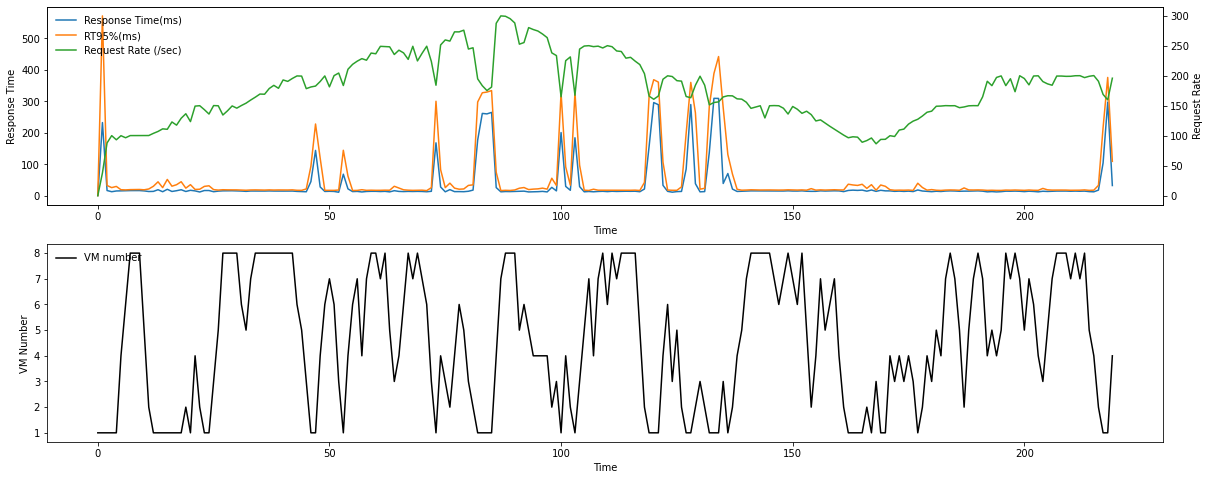

In [8]:
def show(FROM=0, TO=-1):

    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'][FROM:TO], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'][FROM:TO], color = 'C1', label='RT95%(ms)')

    ax2 = ax1.twinx()

    l3 = ax2.plot(df['request_rate'][FROM:TO], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'][FROM:TO], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

show()

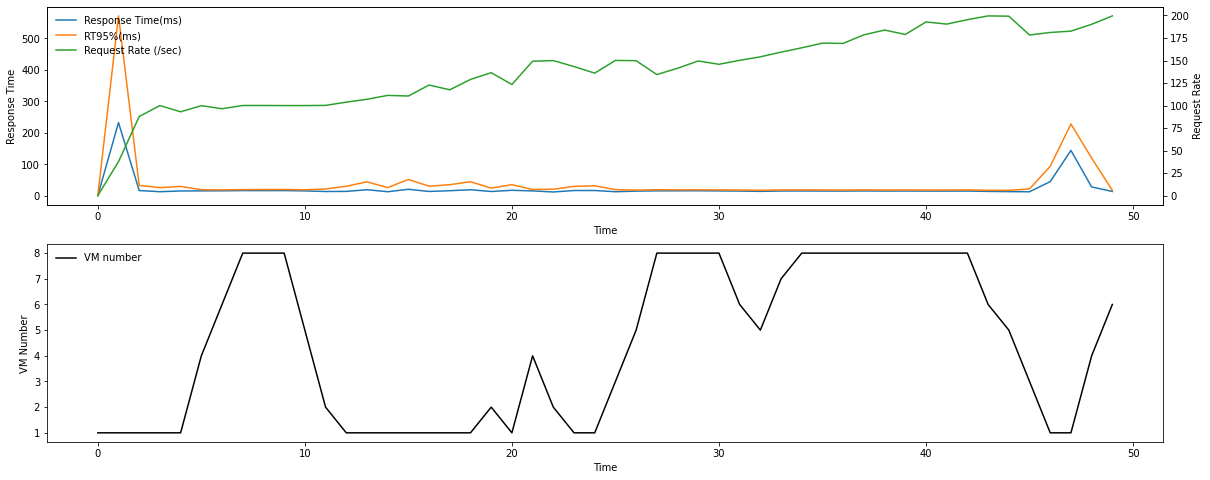

In [9]:
show(0, 50)

In [10]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,221.00,221.00,221.00,221.00
mean,54.86,33.60,4.59,177.40
std,94.19,61.24,2.59,54.13
min,0.51,0.51,1.00,0.10
25%,17.78,13.71,2.00,143.30
50%,18.78,14.83,5.00,178.90
75%,30.47,16.35,7.00,218.40
max,571.44,309.58,8.00,299.50


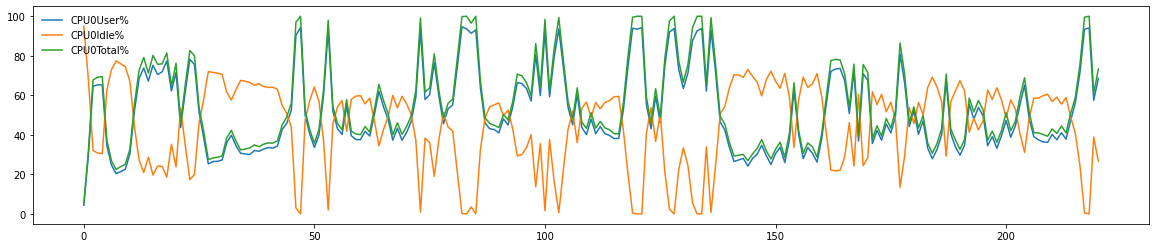

In [11]:
def plot_timeseries_metrics(name: str):

    plt.figure(figsize=(20, 4))

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.plot(df[col_name], label = col_name)

    plt.legend(frameon=False)
    plt.show()

plot_timeseries_metrics('CPU')

In [12]:
df.iloc[:, 7:10].describe()

,CPU0User%,CPU0Idle%,CPU0Total%
count,221.00,221.00,221.00
mean,51.79,44.72,55.16
std,19.90,20.90,20.95
min,4.40,0.00,5.00
25%,37.30,30.50,40.20
50%,46.50,50.20,49.30
75%,65.30,59.70,69.50
max,94.70,94.90,100.00


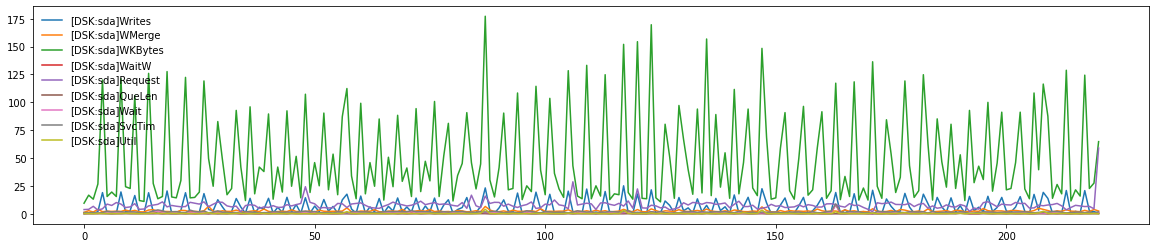

In [13]:
plot_timeseries_metrics('DSK')

In [14]:
df.iloc[:, 10:23].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00
mean,0.00,0.00,0.00,0.00,6.44,2.65,49.49,0.95,8.09,0.08,0.95,1.68,0.45
std,0.00,0.00,0.00,0.00,6.90,0.87,40.89,0.57,4.54,0.07,0.57,0.72,0.45
min,0.00,0.00,0.00,0.00,0.40,1.40,9.60,0.30,1.80,0.00,0.30,0.30,0.20
25%,0.00,0.00,0.00,0.00,0.70,2.10,17.20,0.70,6.10,0.00,0.70,1.30,0.30
50%,0.00,0.00,0.00,0.00,2.60,2.40,29.20,0.90,7.80,0.10,0.90,1.60,0.40
75%,0.00,0.00,0.00,0.00,12.90,3.00,85.20,1.10,9.10,0.10,1.10,2.00,0.50
max,0.00,0.00,0.00,0.00,25.20,6.80,177.20,8.10,59.00,0.50,8.10,9.00,4.10


In [15]:
df.iloc[:, 23:31].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,221.00,221.00,221.00,221.00,221.00,221.00,221.00,221.00
mean,"1,897,268.28","138,099.72","126,649.56","216,631.87","798,489.71",0.00,"565,415.68",100.00
std,"5,677.01","5,677.01","2,301.51",745.74,629.90,0.00,"2,502.53",0.00
min,"1,878,903.20","128,632.80","118,892.00","215,416.00","794,397.60",0.00,"561,942.80",100.00
25%,"1,892,070.40","132,818.40","125,027.20","216,012.00","798,259.20",0.00,"563,145.60",100.00
50%,"1,898,204.80","137,163.20","127,701.60","216,576.00","798,532.40",0.00,"564,704.00",100.00
75%,"1,902,549.60","143,297.60","128,365.20","217,160.00","798,833.60",0.00,"567,812.40",100.00
max,"1,906,735.20","156,464.80","130,273.60","218,126.00","800,788.00",0.00,"569,630.00",100.00


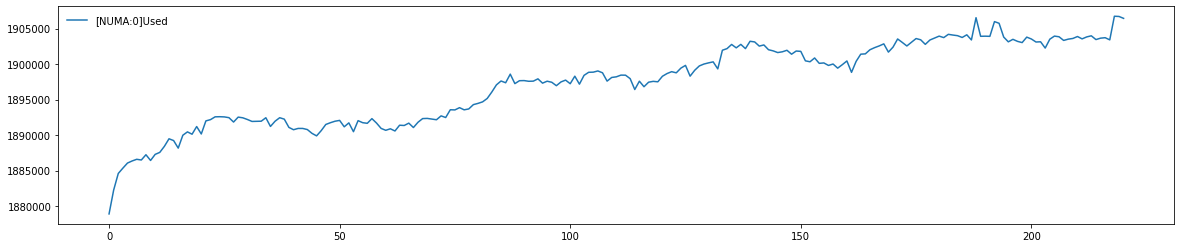

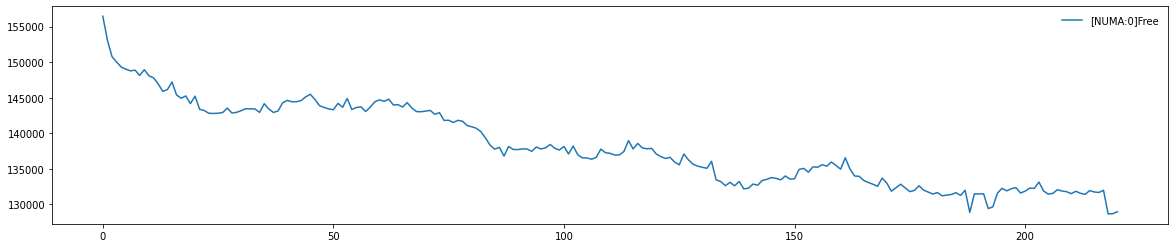

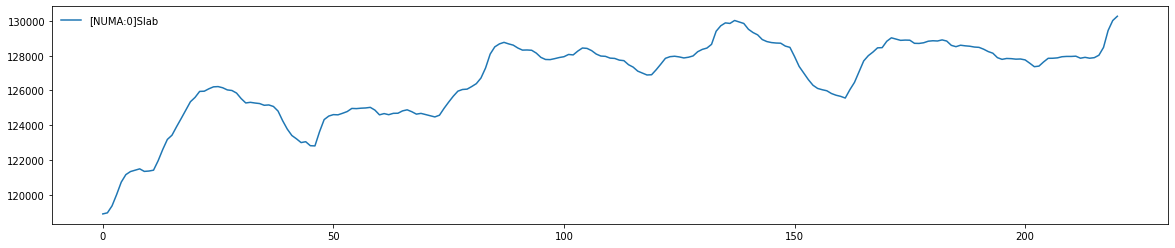

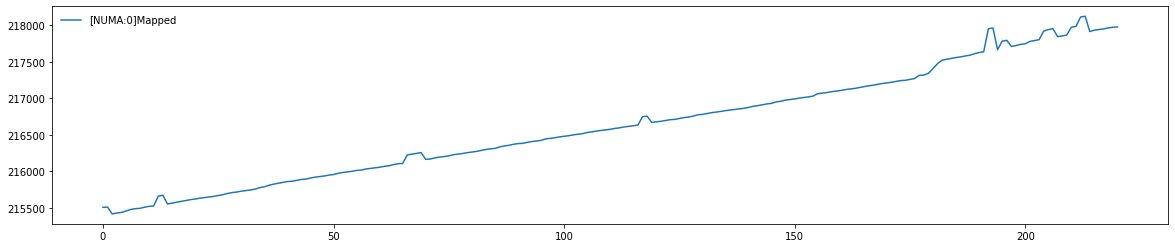

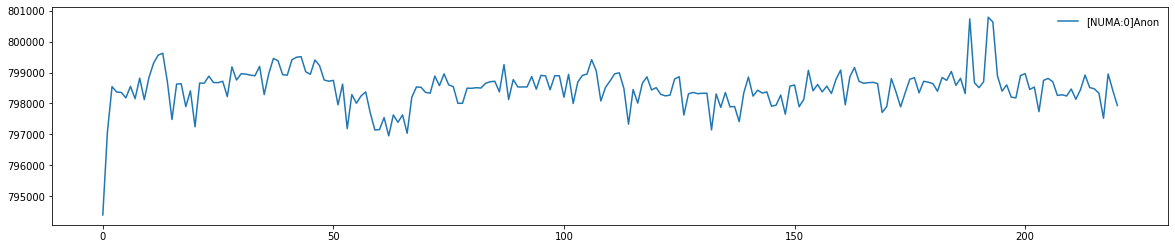

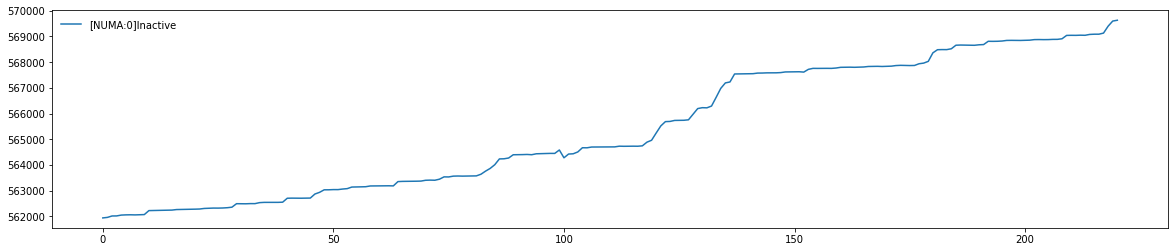

In [16]:
def plot_timeseries_metrics_separate(name: str):

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.figure(figsize=(20, 4))
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(df[col_name], label = col_name)
                plt.legend(frameon=False)
                plt.show()

plot_timeseries_metrics_separate('NUMA')

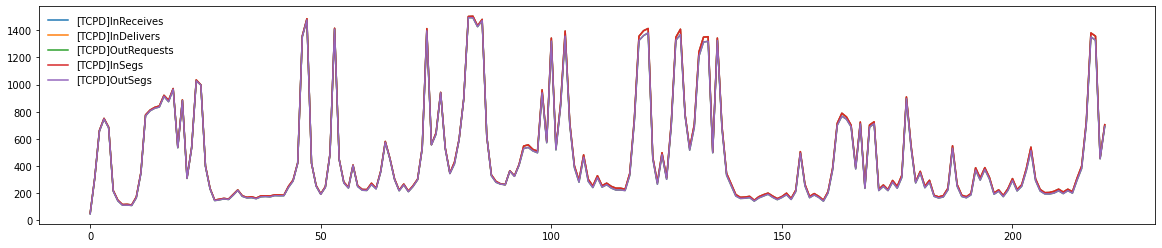

In [17]:
plot_timeseries_metrics('TCP')

## Before metric After metric

Itt állítom elő a metrikából a before after értékeket

Ennek a prototípusát dolgoztam ki és ellenőriztem le itt.

In [18]:
mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,actual_vm_number_is,actual_vm_number_was,actual_vm_number_will,delta_vm
0,192.168.0.6,18:53:47,18:53:4,0.51,0.51,1,0.10,4.40,94.90,5.00,...,100.00,53.40,53.40,48.10,53.40,48.10,1,NaN,1.00,0.00
1,192.168.0.6,18:53:50,18:53:5,571.44,232.55,1,37.80,29.80,67.90,32.00,...,100.00,315.30,315.30,313.60,315.30,313.70,1,1.00,1.00,0.00
2,192.168.0.6,18:54:00,18:54:0,32.62,16.63,1,87.90,64.60,32.10,67.80,...,100.00,661.90,661.90,656.70,661.40,656.30,1,1.00,1.00,0.00
3,192.168.0.6,18:54:10,18:54:1,25.94,12.89,1,100.00,65.30,30.80,69.10,...,100.00,751.00,751.00,746.10,751.00,746.20,1,1.00,1.00,0.00
4,192.168.0.6,18:54:20,18:54:2,29.68,15.21,1,93.10,65.30,30.50,69.50,...,100.00,686.30,686.30,682.70,686.30,682.80,1,1.00,4.00,3.00


In [19]:
mf['delta_vm'].unique()

array([ 0.,  3.,  2., -3., -1.,  1., -2., nan])

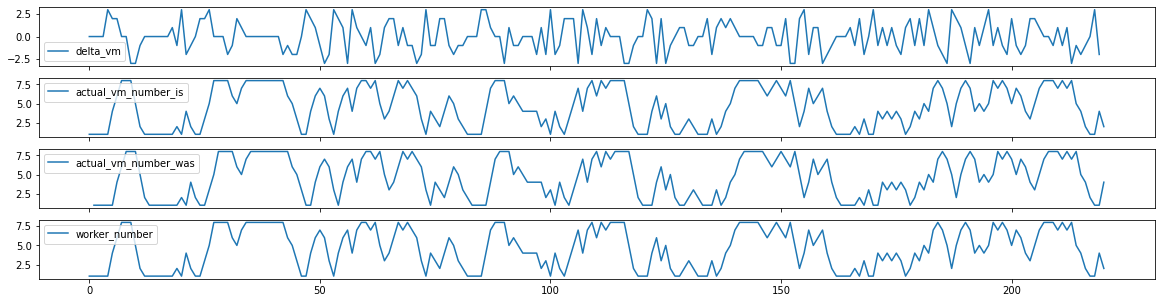

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'], label='delta_vm'); ax1.legend()
ax2.plot(mf['actual_vm_number_is'], label='actual_vm_number_is'); ax2.legend()
ax3.plot(mf['actual_vm_number_was'], label='actual_vm_number_was'); ax3.legend()
ax4.plot(mf['worker_number'], label='worker_number'); ax4.legend()
plt.show()

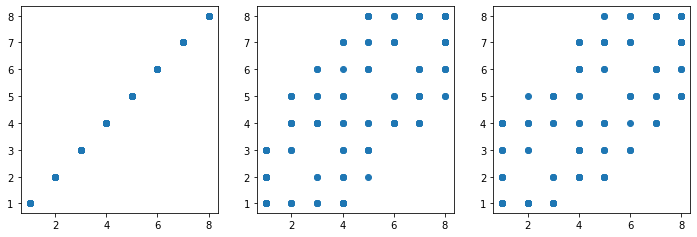

In [21]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3.8))
ax0.scatter(mf['worker_number'], mf['actual_vm_number_is'])
ax1.scatter(mf['worker_number'], mf['actual_vm_number_was'])
ax2.scatter(mf['worker_number'], mf['actual_vm_number_will'])
plt.show()

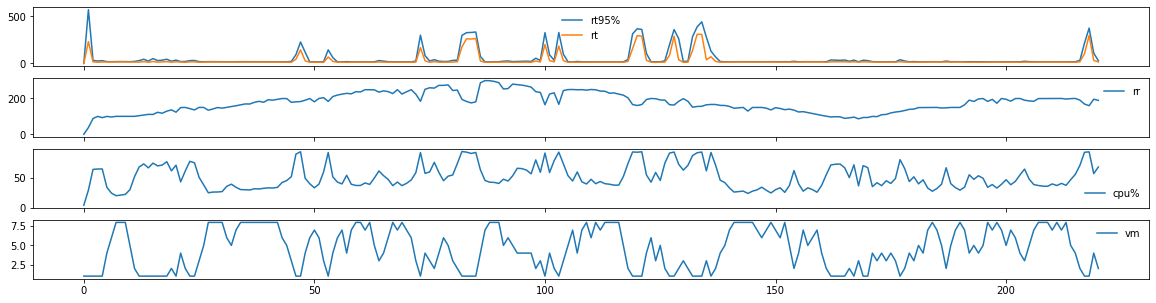

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'], label='rt95%'); ax1.legend(frameon=False)
ax1.plot(mf['response_time'], label='rt');        ax1.legend(frameon=False)
ax2.plot(mf['request_rate'], label='rr');         ax2.legend(frameon=False)
ax3.plot(mf['CPU0User%'], label='cpu%');          ax3.legend(frameon=False)
ax4.plot(mf['worker_number'], label='vm');        ax4.legend(frameon=False)
plt.show()

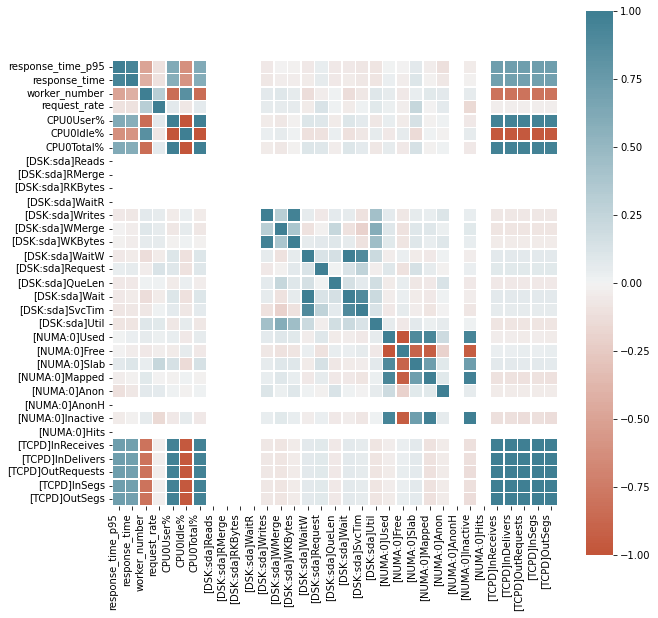

In [23]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [24]:
input_variables = ['CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', 'request_rate', 'response_time', 'worker_number']

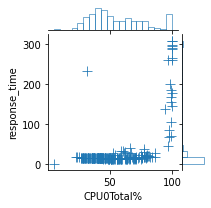

In [25]:
sns.jointplot(
    height=3.0,
    data=df, x='CPU0Total%', y='response_time',
    marker="+", s=100, marginal_kws=dict(bins=20, fill=False),
); plt.show()

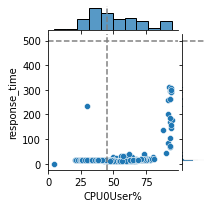

In [26]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=500); plt.show()

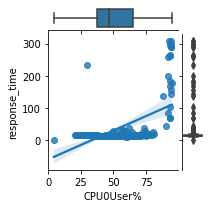

In [27]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.regplot, sns.boxplot); plt.show()

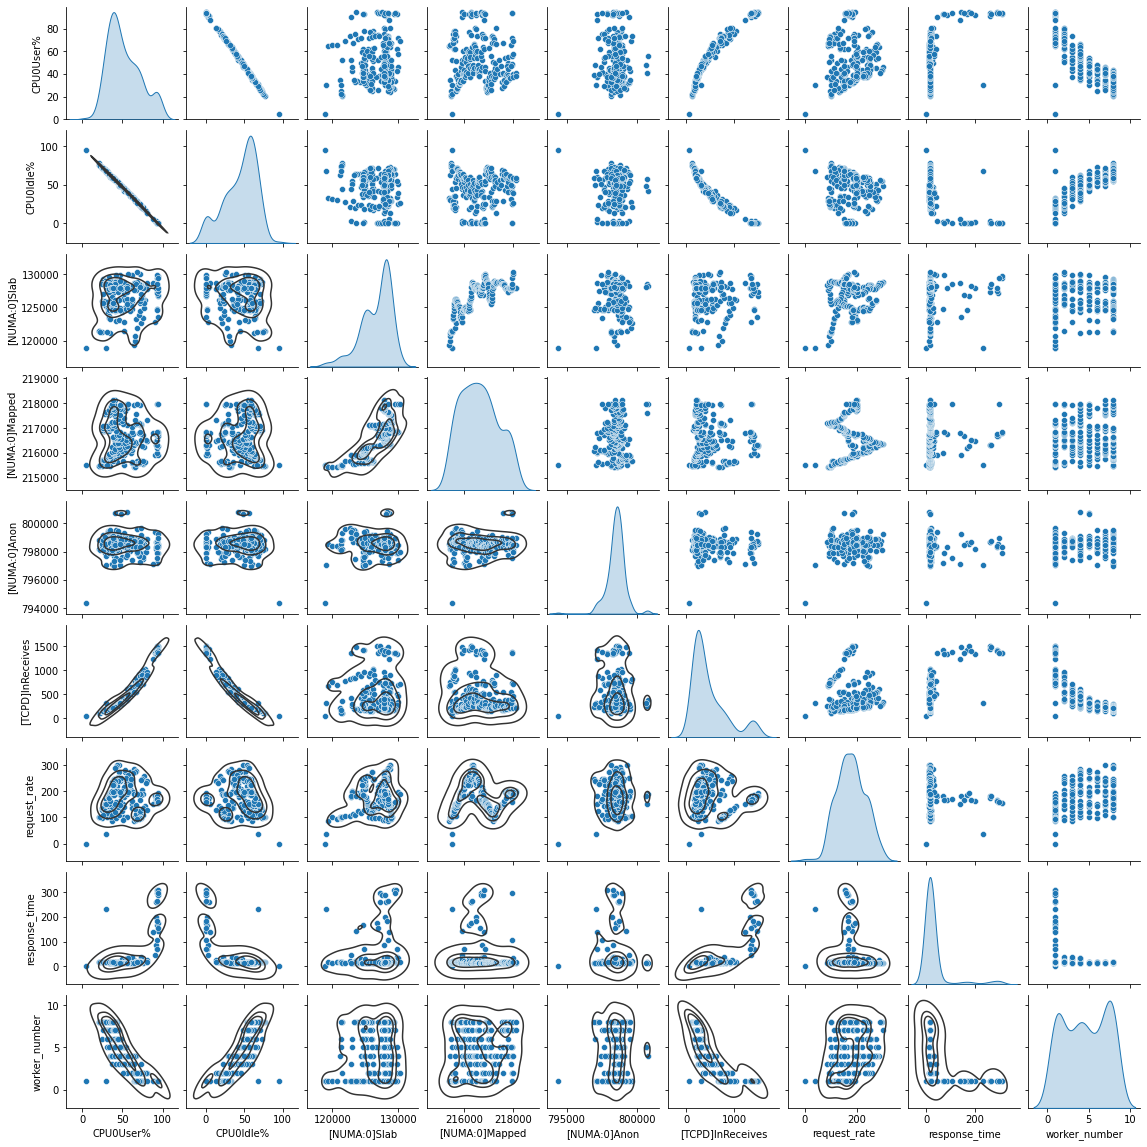

In [29]:
g = sns.pairplot(df[input_variables], diag_kind='kde', height=1.8)
g.map_lower(sns.kdeplot, levels=4, color='.2'); plt.show()

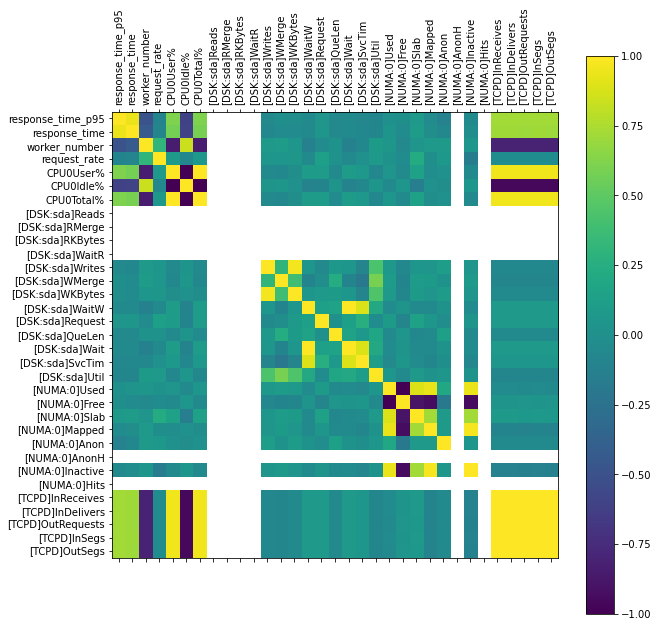

In [31]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
# plt.title('Correlation Matrix', fontsize=16);

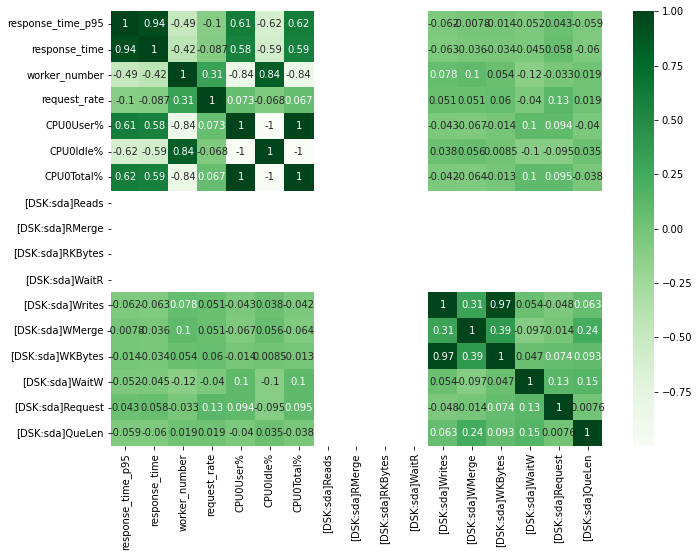

In [32]:
df = df.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [ ]:
df.isnull().values.any()

In [ ]:
# kibaszni azokat az oszlopokat amelyek értéke konstans

for c in df.select_dtypes(exclude='object').columns:
    std = df[c].std()
    if std == 0:
        df.drop([c], axis=1, inplace=True)
        print(c)

ValueError: The condensed distance matrix must contain only finite values.

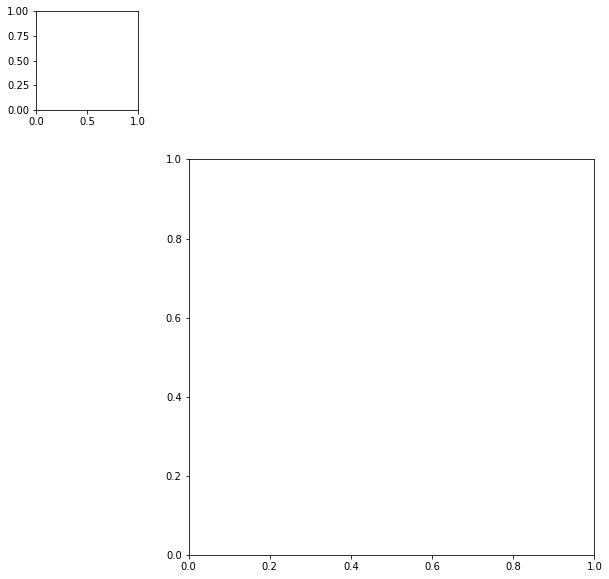

In [33]:
g = sns.clustermap(df.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

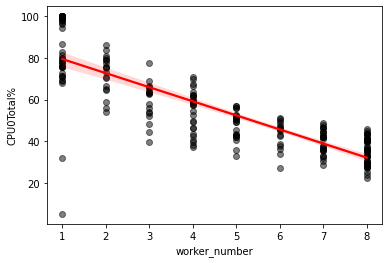

In [34]:
def scatter(x, y, color='black', alpha=0.5, lc='red', ci=95):
    sns.regplot(x=x,
                y=y,
                scatter_kws={
                    'color': color,
                    'alpha': alpha
                },
                line_kws={
                    'color': lc
                },
                ci=95)
    plt.show()

scatter(mf['worker_number'], mf['CPU0Total%'])

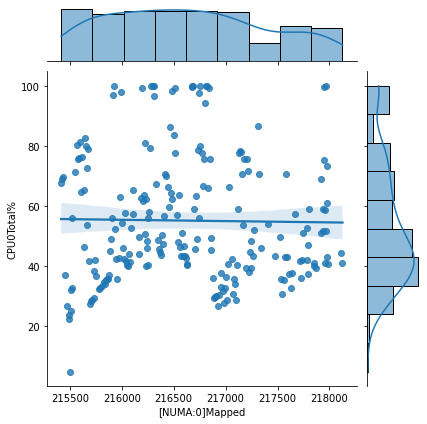

In [35]:
def join(x, y, data):
    sns.jointplot(x=x, y=y, data=data, kind='reg');

join('[NUMA:0]Mapped', 'CPU0Total%', mf)

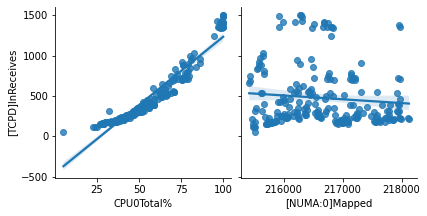

In [36]:
def pair(x_vars, y_vars, data):
    sns.pairplot(data, x_vars=x_vars, y_vars=y_vars,
             height=3, aspect=1.0, kind='reg');

pair(['CPU0Total%', '[NUMA:0]Mapped'], ['[TCPD]InReceives'], mf)

In [37]:

# Itt a vége fuss el véle


In [226]:
# Control the chaos